# Chapter 1

In [1]:
import numpy as np
import math
import statistics as stats
import scipy.stats as scistats
import matplotlib.pyplot as plt
import matplotlib.colors as color
import os
import sys
from pandas import read_table
from netCDF4 import Dataset as ds
import cartopy
import cartopy.feature as cpf
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# These import statements bring in the python packages we'll need. 
plt.rcParams['figure.figsize'] = (12, 12)

In [6]:
def skewness(data):
    mu = stats.mean(data)
    sigmaInv = 1/stats.stdev(data)
    skew = ((data - mu)*sigmaInv)**3
    return stats.mean(skew)
    
def kurtosis(data):
    mu = stats.mean(data)
    sigmaInv = 1/stats.stdev(data)
    kurt = ((data - mu)*sigmaInv)**4
    return stats.mean(kurt) - 3

## Figure 1.1

In [2]:
os.chdir(r"C:\Users\josep\Documents\School Work\Research\Shen\Python Translations\Statistics and Data Visualization in Climate Science; Shen & North")
# Change current working directory to where our data is.

NOAAtemp = read_table("aravg.ann.land_ocean.90S.90N.v4.0.1.201907.txt", 
                      header = None, delimiter = "\s+")
# We need to specfify the name of the file, whether we have a header to 
# disregard (in this case, none), and the delimiter for the text file; 
# which in this case is a regular expression for any number of consecutive
# spaces. Dimension of Data set 'NOAAtemp' should be 140 rows by 6 columns
print("The dimension of our data table is:", NOAAtemp.shape)

x = np.array(NOAAtemp.loc[0:138, 0])
y = np.array(NOAAtemp.loc[0:138, 1])
# For the next couple of graphs, we'll need the information from the 
# first and second columns up to. The data from 
print(x.shape)
print(y.shape)

The dimension of our data table is: (140, 6)
(139,)
(139,)


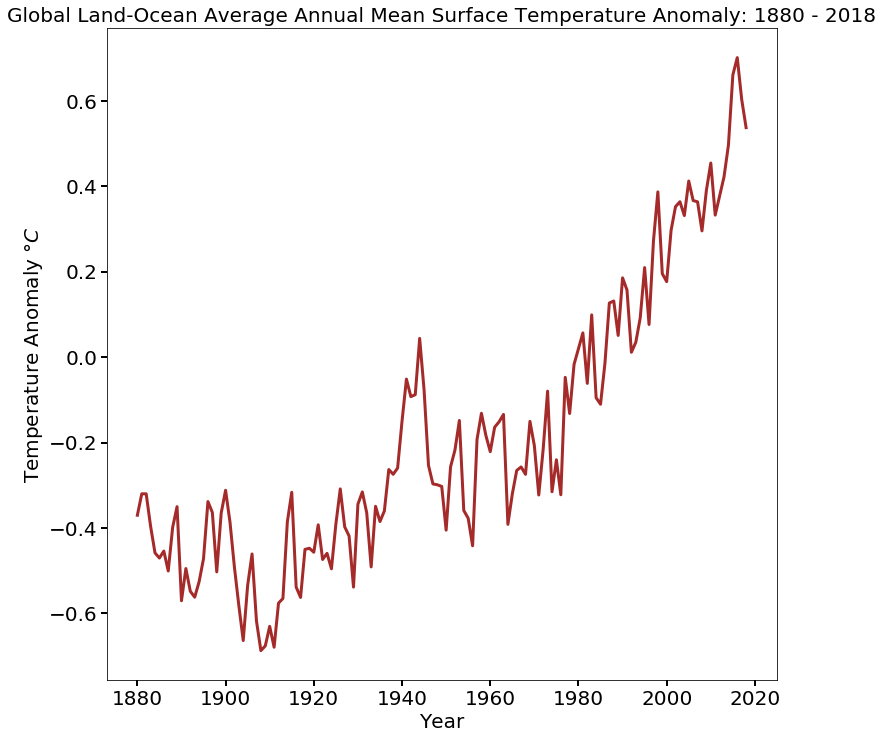

In [9]:
# 1.1 (a)
plt.title(r"Global Land-Ocean Average Annual Mean Surface Temperature Anomaly: 1880 - 2018", size = 20)
plt.plot(x, y, 'brown', linewidth = 3);
plt.xlabel("Year", size = 20)
plt.ylabel("Temperature Anomaly $\degree C$", size = 20);
plt.tick_params(length=6, width=2, labelsize=20)

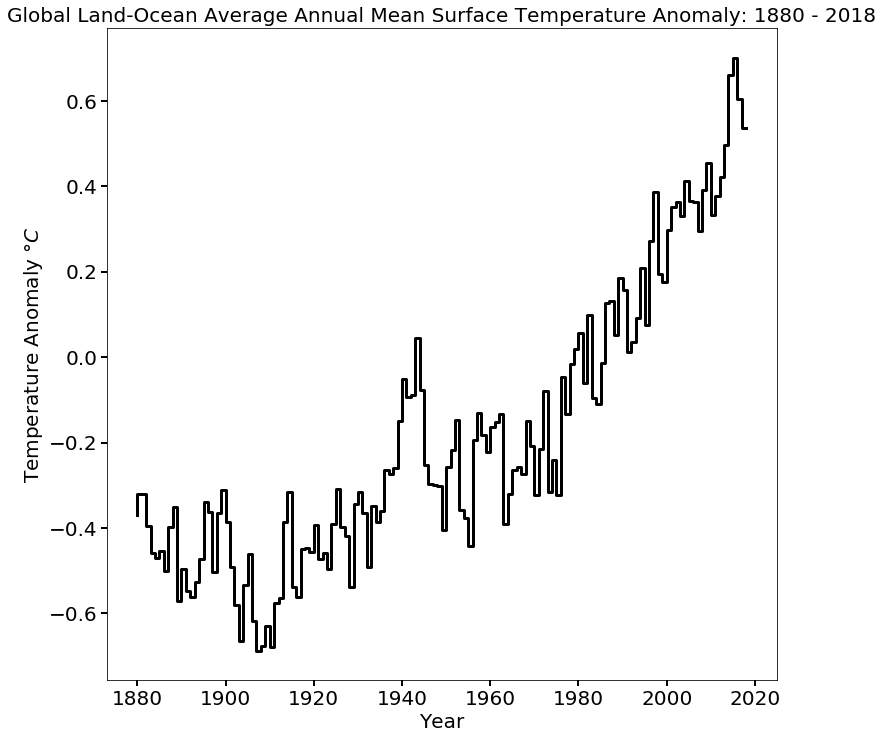

In [10]:
# 1.1 (b)
plt.title(r"Global Land-Ocean Average Annual Mean Surface Temperature Anomaly: 1880 - 2018", size = 20)
kwargs = {'drawstyle' : 'steps'}
plt.plot(x, y, 'black', linewidth = 3, **kwargs);
plt.xlabel("Year", size = 20)
plt.ylabel("Temperature Anomaly $\degree C$", size = 20);
plt.tick_params(length=6, width=2, labelsize=20)

In [11]:
# 1.1 (c)
z = np.ones(y.size)
z[0] = -99
z[1] = -99
for i in range(2, z.size - 2):
    z[i] = np.mean(y[i-2:i+3])
z[z.size - 2] = -99
z[z.size - 1] = -99

y1 = [y[i] for i in range(y.size) if y[i] >= 0]
x1 = [x[i] for i in range(y.size) if y[i] >= 0]

y2 = [y[i] for i in range(y.size) if y[i] < 0]
x2 = [x[i] for i in range(y.size) if y[i] < 0]

y3 = z[2:x.size-2]
x3 = x[2:x.size-2]

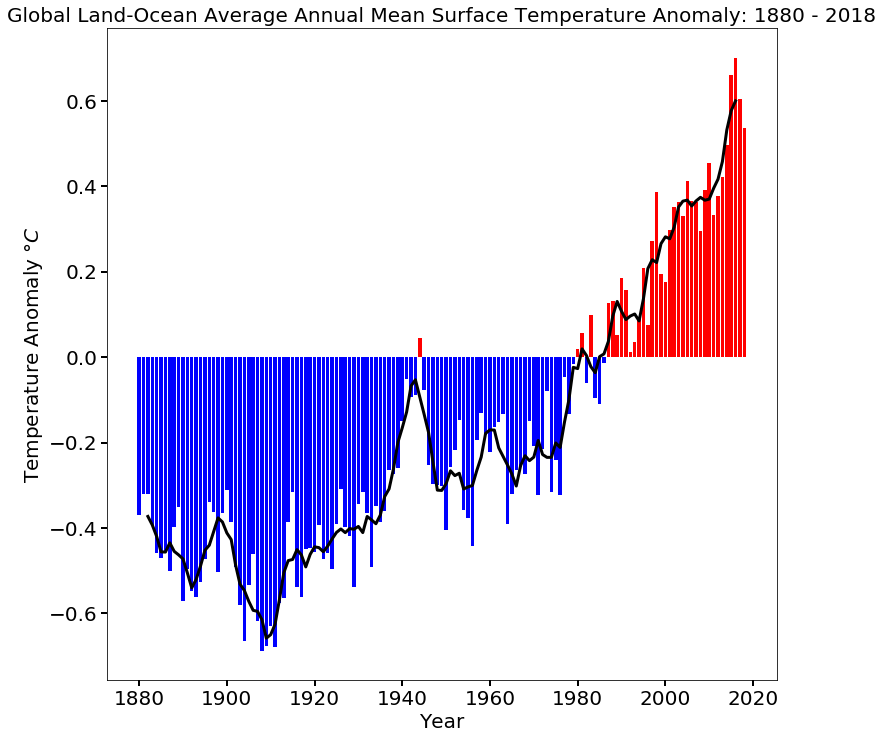

In [12]:
plt.title(r"Global Land-Ocean Average Annual Mean Surface Temperature Anomaly: 1880 - 2018", size = 20)
plt.plot(x3, y3, 'black', linewidth = 3)
plt.bar(x1, y1, color = 'red');
plt.bar(x2, y2, color = 'blue');
plt.xlabel("Year", size = 20)
plt.ylabel("Temperature Anomaly $\degree C$", size = 20);
plt.tick_params(length=6, width=2, labelsize=20)

### Statistical Indices

In [13]:
temp2018 = np.array(NOAAtemp.loc[0:138, 1])
# Temperature data up to 2018

print("The first six elements (or head) of the data is:\n", temp2018[0:6], "\n")

print("The Mean is %f.\n" % stats.mean(temp2018))
# Arithmetic average of data values

print("The Standard Deviation is %f.\n" % stats.stdev(temp2018))
# Standard deviation of the data

print("The Variance is %f.\n" % stats.variance(temp2018))
# Variance of the data

print("The Skewness is %f.\n" % skewness(temp2018))
# Skewness of the data

print("The Kurtosis is %f.\n" % kurtosis(temp2018))
# Kurtosis of the data

print("The Median is %f.\n" % stats.median(temp2018))
# Median of the data

print("The 5th, 25th, 75th and 95th percentiles are:")
probs = [5, 25, 75, 95]
print([round(np.percentile(temp2018, p),5) for p in probs])
print()

The first six elements (or head) of the data is:
 [-0.370221 -0.319993 -0.320088 -0.396044 -0.458355 -0.470374] 

The Mean is -0.185863.

The Standard Deviation is 0.324757.

The Variance is 0.105467.

The Skewness is 0.774270
.
The Kurtosis is -0.261913.

The Median is -0.274434.

The 5th, 25th, 75th and 95th percentiles are:
[-0.57649, -0.41198, 0.01552, 0.41324]



We use $x = \{x_1, x_2,\cdots, x_n\}$ to denote the time series data.
Symbolically the above statistical indices are defined as:
\begin{align*}
\text{Mean: }\mu(x) &= \frac{1}{n}\sum_{k=1}^n x_k\\
\text{Variance by unbiased estimate: } \sigma^2(x) &= \frac{1}{n-1}\sum_{k=1}^n \left(x_k - \mu(x)\right)^2\\
\text{Standard Deviation: } \sigma(x) &= \sqrt{\sigma^2(x)}\\
\text{Skewness: } \gamma_3(x) &= \frac{1}{n}\sum_{k=1}^n \left(\frac{x_k - \mu(x)}{\sigma(x)}\right)^3\\
\text{Kurtosis: } \gamma_4(x) &= \frac{1}{n}\sum_{k=1}^n \left(\frac{x_k - \mu(x)}{\sigma(x)}\right)^4 - 3\\
\end{align*}

## Figure 1.2

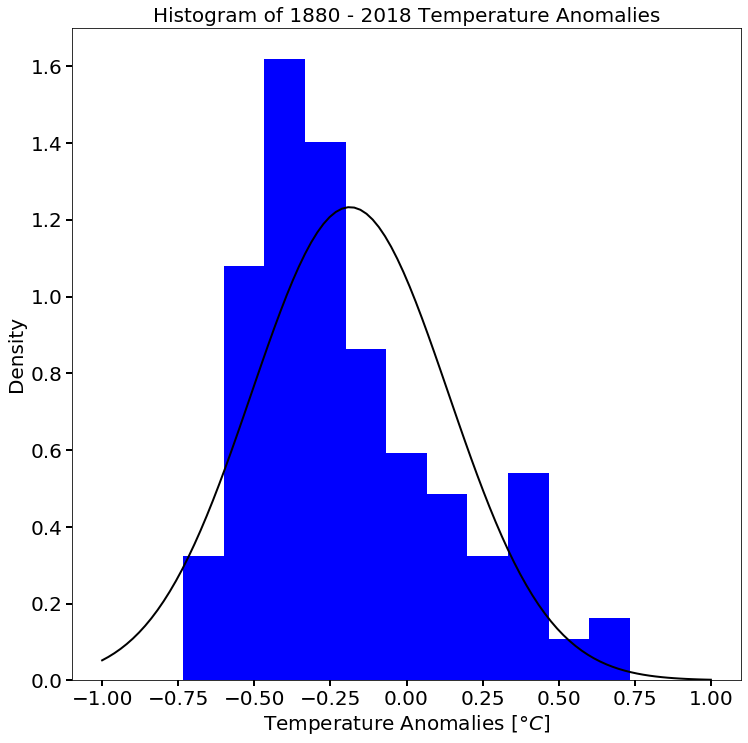

In [14]:
mu, std = scistats.norm.fit(y)
points = np.linspace(-1, 1, 100)
plt.title(r"Histogram of 1880 - 2018 Temperature Anomalies", size = 20)
plt.hist(y, bins = 15, range=(-1,1), color ='b', density = True);
plt.plot(points, scistats.norm.pdf(points, mu, std), color = 'k', linewidth = 2)
plt.xlabel("Temperature Anomalies [$\degree C$]", size = 20)
plt.ylabel("Density", size = 20);
plt.tick_params(length=6, width=2, labelsize=20)

## Figure 1.3

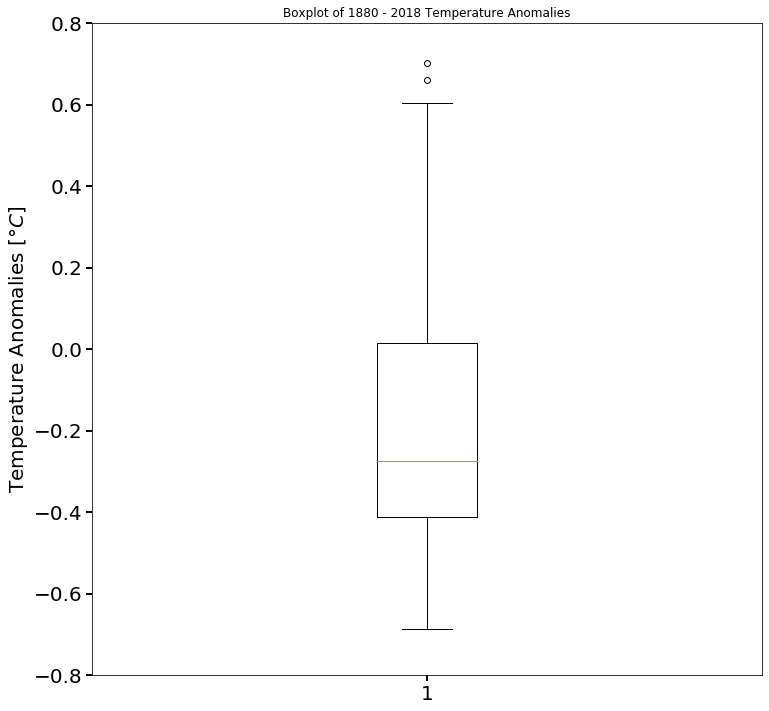

In [15]:
plt.boxplot(y);
plt.ylabel("Temperature Anomalies [$\degree C$]", size = 20)
plt.title("Boxplot of 1880 - 2018 Temperature Anomalies")
plt.ylim(-.8, .8);
plt.tick_params(length=6, width=2, labelsize=20)

## Figure 1.4: Needs Work

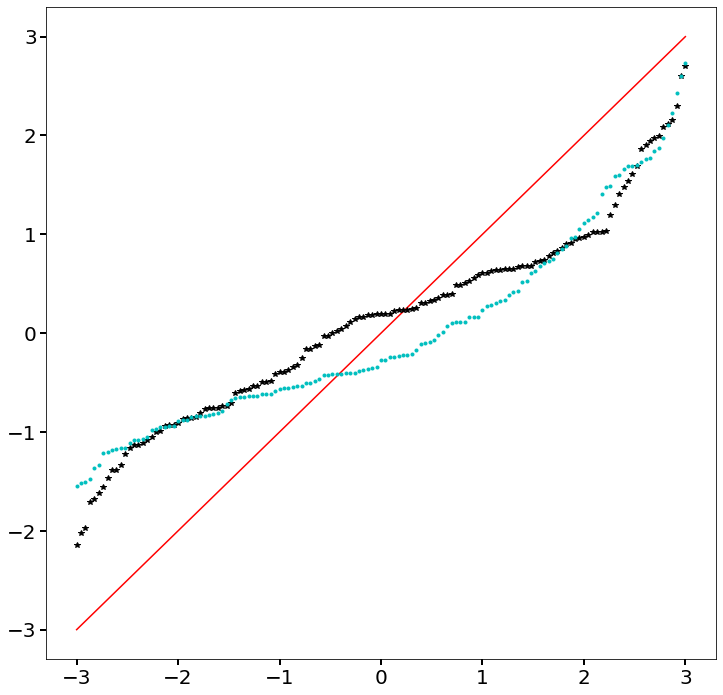

In [16]:
line = np.linspace(-3, 3, y.size)
t_stand = np.sort((y - np.mean(y))/stats.stdev(y))
np.random.seed(101)
qn = np.sort(np.random.normal(size=y.size))
plt.plot(line, line, 'r-');
plt.plot(line, qn, 'k*');
plt.plot(line, t_stand, 'c.');
plt.tick_params(length=6, width=2, labelsize=20)

## Figure 1.5

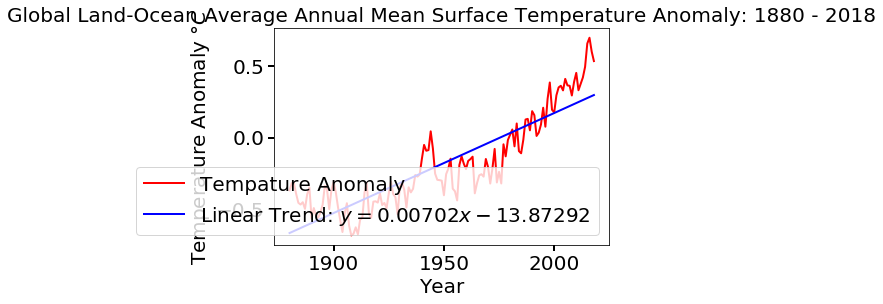

In [3]:
trend = np.array(np.polyfit(x, y, 1))
abline = trend[1] + x*trend[0]
plt.plot(x, y, 'r-', linewidth = 2, label = "Tempature Anomaly");
plt.plot(x, abline, 'b-', linewidth = 2, label = "Linear Trend: $y = %.5f x %.5f$" % (trend[0], trend[1]));
plt.title("Global Land-Ocean Average Annual Mean Surface Temperature Anomaly: 1880 - 2018", size = 20);
plt.legend(loc = 'lower right', prop={'size':20});
plt.tick_params(length=6, width=2, labelsize=20)
plt.xlabel("Year", size = 20)
plt.ylabel("Temperature Anomaly $\degree C$", size = 20);

In [8]:
nc = ds("air.mon.anom.nc", 'r+', "NETCDF4")
print(nc)
lon = nc.variables['lon'][:]
lat = nc.variables['lat'][:]
time = nc.variables['time']
t_bounds = nc.variables['time_bnds']
air = nc.variables['air']

print(np.shape(lon))
print(np.shape(lat))
print(np.shape(time))
print(np.shape(t_bounds))
print(np.shape(air))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.0
    Source: ftp://ftp.ncdc.noaa.gov/pub/data/noaaglobaltemp/operational/
    dataset_title: NOAA Global Surface Temperature (NOAAGlobalTemp)
    References: https://www.esrl.noaa.gov/psd/data/gridded/data.noaaglobaltemp.html
    keywords_vocabulary: Climate and Forecast (CF) Standard Name Table (Version 46, 25 July 2017)
    keywords: Earth Science > Oceans > Ocean Temperature > Sea Surface Temperature, Earth Science > Atmosphere > Atmospheric Temperature > Surface Temperature > Air Temperature
    cdm_data_type: Grid
    dataset_citation_url: https://doi.org/10.25921/9qth-2p70
    references: Vose, R. S., et al., 2012: NOAAs merged land-ocean surface temperature analysis. Bulletin of the American Meteorological Society, 93, 1677-1685. doi: 10.1175/BAMS-D-11-00241.1. Huang, B., Peter W. Thorne, et. al, 2017: Extended Reconstructed Sea Surface Temperature version 5 (ERSS

Look up Spyder Files.

In [9]:
NOAAgridT = np.reshape(air, (1679,36,72))
mapmat = NOAAgridT[1631,:,:]
top = 6
bottom = -6
mapmat = np.array([[j if j < top else top for j in i] for i in mapmat])
mapmat = np.array([[j if j > bottom else bottom for j in i] for i in mapmat])

np.all(np.isnan(mapmat))

False

In [10]:
def color_pop(colMat, colVec, diff):
    if(colMat.shape[0] < 2*diff and colMat.shape[0] > diff):
        colMat[0] = color.to_rgba(colVec[0])  
    if(colMat.shape[0] < diff):
        return colMat
    else:
        colMat[-1] = color.to_rgba(colVec[-1])
        return np.concatenate((color_pop(colMat[:colMat.shape[0] - diff], colVec[:-1], diff),colMat[colMat.shape[0] - diff:]))
    
def color_ave(colMat):
    indices = np.array([j for j in range(0,colMat.shape[0]) if sum(colMat[j]) > 0])
    for i in range(indices.size-1):
        diff = indices[i + 1] - indices[i]
        off = (colMat[indices[i + 1]] - colMat[indices[i]])
        colMat[indices[i]:indices[i + 1]] = np.array([colMat[indices[i]] + (off/diff)*j for j in range(diff)])
    
    return colMat

In [12]:
cols = np.array(['black','blue','darkgreen','green','yellow','pink','red','maroon'])
values = np.zeros((256,4))
diff = int(values.shape[0]/(cols.size - 1))
myColMap = color_ave(color_pop(values, cols, diff))
myColMap = color.ListedColormap(myColMap)
clev = np.linspace(mapmat.min(), mapmat.max(), 501)

## Figure 1.6

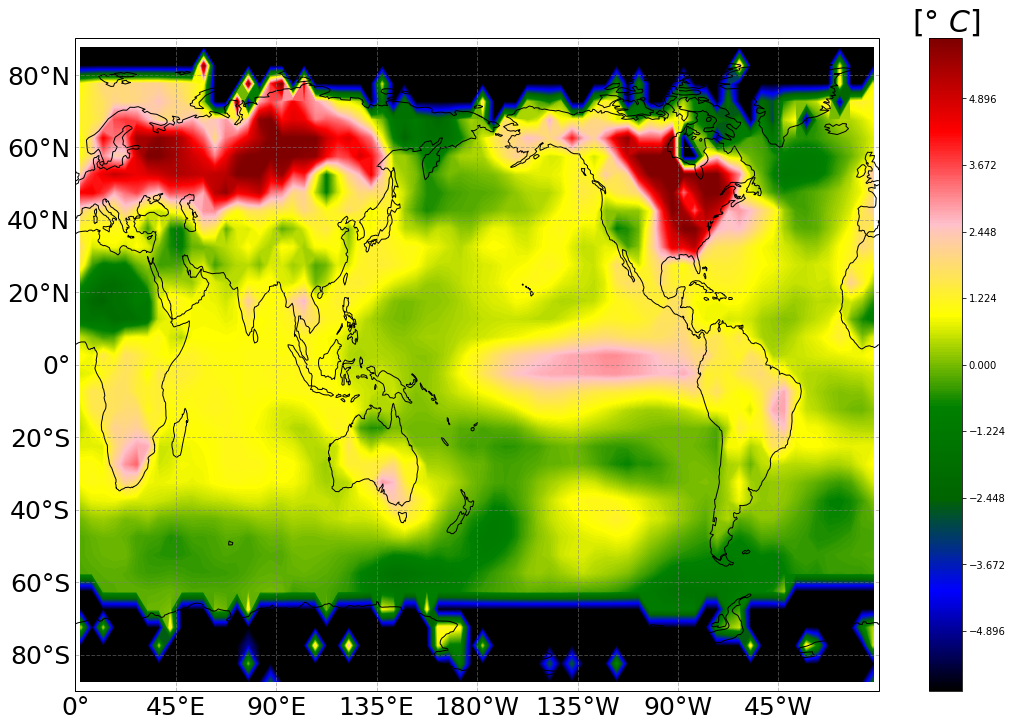

In [43]:
fig, ax = plt.subplots(figsize=(18,12))
ax = plt.subplot(1, 1, 1, projection=cartopy.crs.PlateCarree(central_longitude=180))
ax.coastlines()
ax.set_extent([0, 359, -90, 90])
contf = ax.contourf(lon-180, lat, mapmat, clev, cmap=myColMap)
plt.colorbar(contf, drawedges=False)
ax.set_aspect('auto')
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-225, -180, -135, -90, -45, 0, 45, 90, 135])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 25}
gl.ylabel_style = {'size': 25}
ax.text(195, 92, "$[\degree\ C]$", fontsize=30, color='black');

## Figure 1.7
### Needs work

TypeError: transform_points() missing 1 required positional argument: 'y'

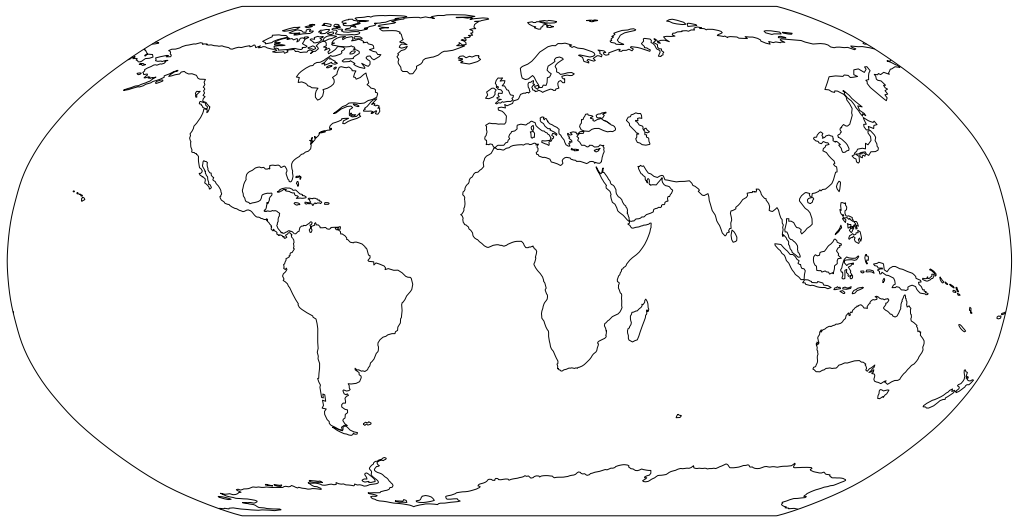

In [97]:
fig, ax = plt.subplots(figsize=(18,12))
ax = plt.axes(projection=cartopy.crs.Robinson(central_longitude=0.0))
ax.coastlines();
fuck = cartopy.crs.Robinson.transform_points(lon, lat, mapmat)
ax.contourf(lon, lat, fuck, clev, cmap=myColMap, transform=cartopy.crs.Robinson());
#plt.colorbar(contf, drawedges=False)
ax.set_aspect('auto')


C:\Users\josep\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


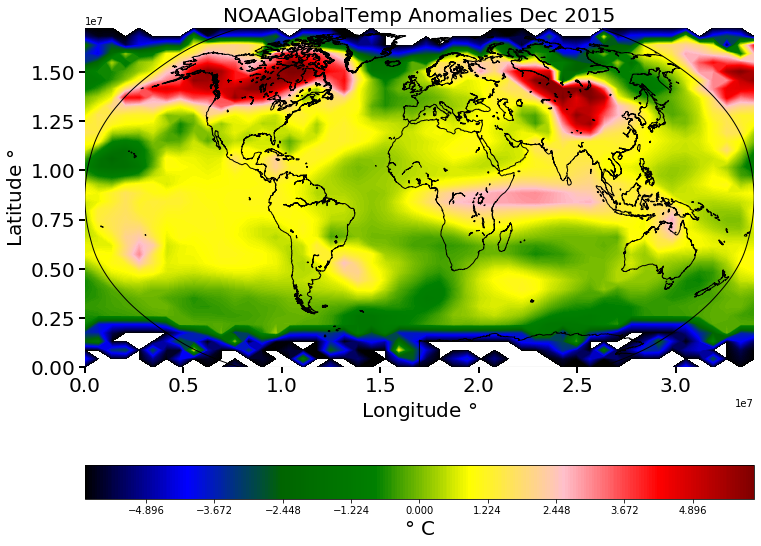

<Figure size 864x864 with 0 Axes>

In [23]:

plt.tick_params(length=6, width=2, labelsize=20)
m = Basemap(lon_0 = -360, projection='robin', 
            resolution='l', suppress_ticks=False)
#            llcrnrlat=-90, urcrnrlat=90,
#            llcrnrlon=0, urcrnrlon=360, )
m.drawcoastlines(linewidth=1)
mapmatS, lonS, latS = m.transform_scalar(mapmat, lon - 180, lat, 50, 40, returnxy = True)
contf = plt.contourf(lonS, latS, mapmatS, clev, cmap=myColMap);
plt.title("NOAAGlobalTemp Anomalies Dec 2015", size = 20)
plt.xlabel("Longitude $\degree$", size = 20)
plt.ylabel("Latitude $\degree$", size = 20)
colbar = plt.colorbar(contf, orientation='horizontal', 
                      extendrect=False)
colbar.ax.set_xlabel("$\degree$ C", size = 20)
plt.savefig("AirTempContourfNonRect.jpg");
plt.figure();

## Figure 1.8

In [24]:
mapmat2 = NOAAgridT[1308:1668,11:23,29]

mapmat2 = np.array([[j if j < 2 else 2 for j in i] for i in mapmat2])
mapmat2 = np.array([[j if j > -2 else -2 for j in i] for i in mapmat2])

mapmat2 = np.transpose(mapmat2)
print(mapmat2.shape)
lat3 = np.linspace(-30,30, 12)
print(lat3.shape)
time = np.linspace(1989, 2018, 360)
print(time.shape)

(12, 360)
(12,)
(360,)


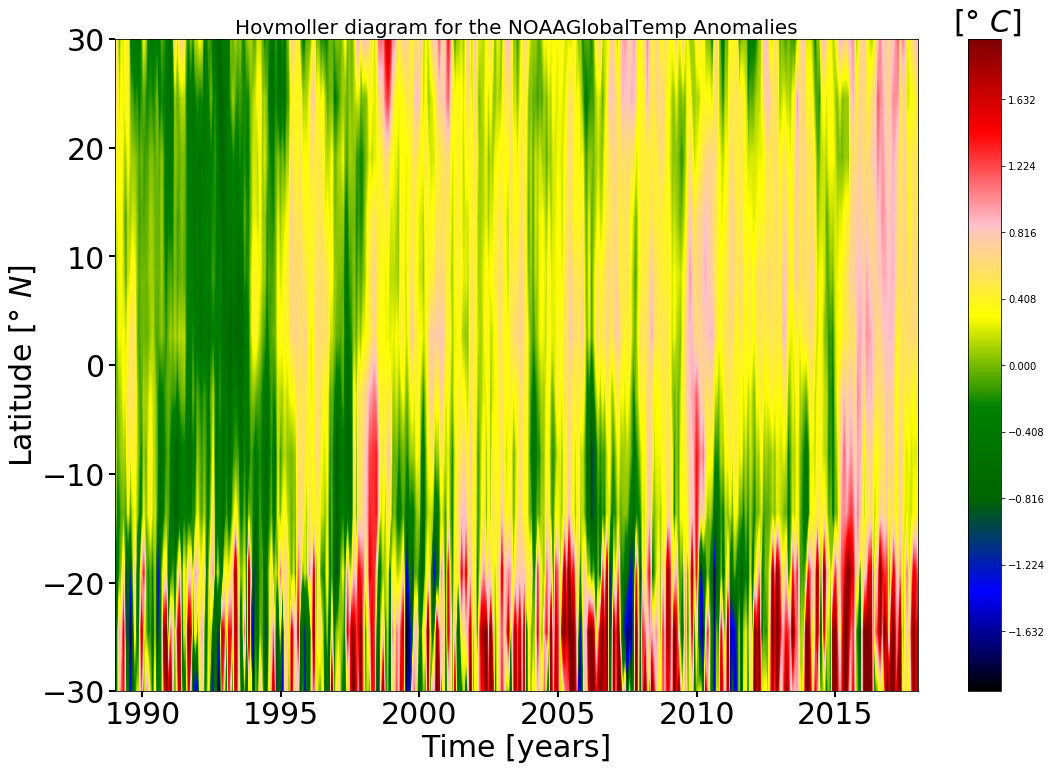

In [25]:
plt.figure(figsize=(18,12));
clev2 = np.linspace(mapmat2.min(), mapmat2.max(), 501)
contf = plt.contourf(time, lat3, mapmat2, clev2, cmap=myColMap);
plt.text(2019.25, 30.75, "$[\degree\ C]$", fontsize=30, color='black')
plt.title("Hovmoller diagram for the NOAAGlobalTemp Anomalies", size = 20)
plt.xlabel("Time [years]", size = 30)
plt.ylabel("Latitude $[\degree\ N]$", size = 30)
plt.tick_params(length=6, width=2, labelsize=30)
colbar = plt.colorbar(contf, drawedges=False)
plt.savefig("HovmollerDiagram.jpg");


In [26]:
nc1 = ds("pottmp.2015.nc", 'r+', "NETCDF4")
print(nc1)
godasT = nc1.variables['pottmp'][:]
print(godasT.shape)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    creation_date: Mon Dec 23 12:15:32 MST 2013
    sfcHeatFlux: 
Note that the net surface heat flux are the total surface heat flux 
from the NCEP reanalysis 2 plus the relaxation terms.
    time_comment: The internal time stamp indicates the FIRST day of the averaging period.
    Conventions: COARDS
    grib_file: godas.M.2014*
    html_REFERENCES: http://www.cpc.ncep.noaa.gov/products/GODAS/background.shtml
    html_BACKGROUND: http://www.cpc.ncep.noaa.gov/products/GODAS/background.shtml
    html_GODAS: www.cpc.ncep.noaa.gov/products/GODAS
    comment: NOTE:  THESE ARE THE BIAS CORRECTED GODAS FILES.
    title: GODAS: Global Ocean Data Assimilation System
    history: Created 2013/12 by Hoop
    References: https://www.esrl.noaa.gov/psd/data/gridded/data.godas.html
    dataset_title: NCEP Global Ocean Data Assimilation System (GODAS)
    dimensions(sizes): level(40), lon(360), lat(418),

In [27]:
climmat = np.zeros((360, 418))
for i in range(360):
    for j in range(418):
        climmat[i,j] = np.mean(godasT[:, 20, j, i])
climmat = np.transpose(climmat)   
lat4 = np.linspace(-75, 65, 418)
long = np.linspace(0, 360, 360)

C:\Users\josep\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Warning: converting a masked element to nan.
  after removing the cwd from sys.path.


## Figure 1.9

C:\Users\josep\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


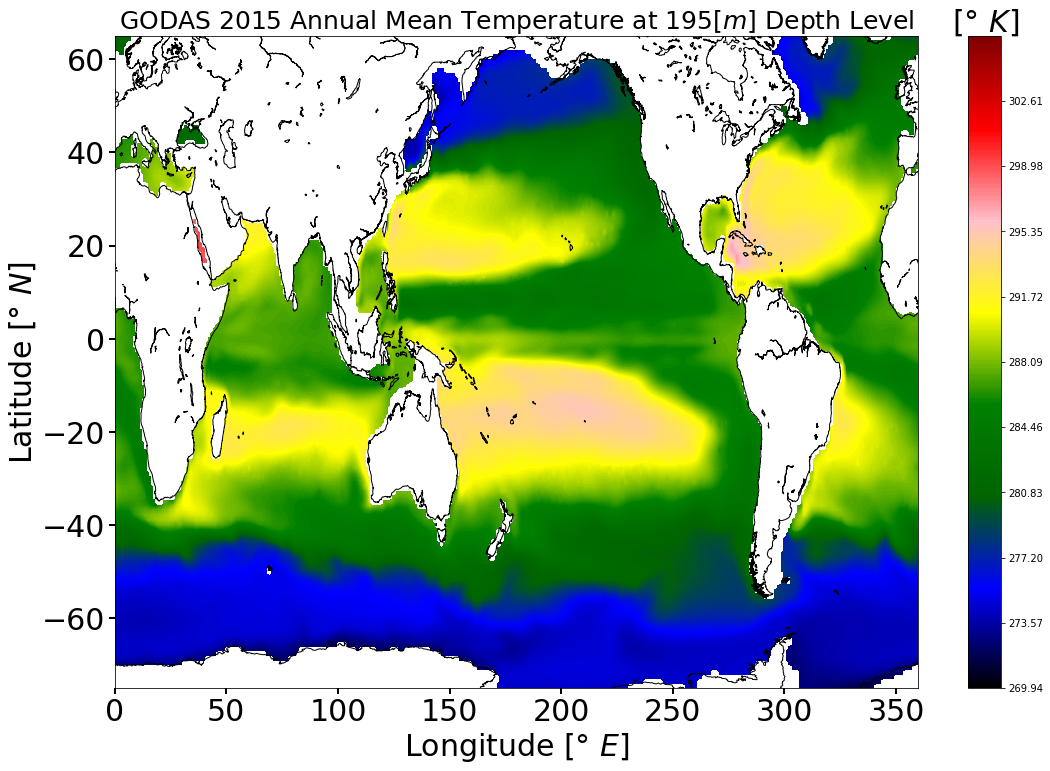

In [28]:
plt.figure(figsize=(18,12));
clev3 = np.arange(godasT.min(), godasT.max(), .01)
contf = plt.contourf(long, lat4, climmat, clev3, cmap=myColMap);
plt.text(375, 66, "$[\degree\ K]$", fontsize=30, color='black')
plt.tick_params(length=6, width=2, labelsize=20)
m = Basemap(projection='cyl', llcrnrlon=0, urcrnrlon=360,
            resolution='l', fix_aspect=False, suppress_ticks=False,
            llcrnrlat=-75, urcrnrlat=65)
m.drawcoastlines(linewidth=1)
plt.title("GODAS 2015 Annual Mean Temperature at 195$[m]$ Depth Level", size = 25)
plt.xlabel("Longitude $[\degree\ E]$", size = 30)
plt.ylabel("Latitude $[\degree\ N]$", size = 30)
plt.tick_params(length=6, width=2, labelsize=30)
colbar = plt.colorbar(contf, drawedges=False)
plt.savefig("godasWaterTemp.jpg");
